In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pprint
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import warnings
import torch
from scipy.special import softmax
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification



In [81]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [82]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is

True

In [125]:
# Reading the text file
with open('tweets.txt', 'r', encoding='utf-8') as file:
    tweets = file.read()
# Reading the text file
with open('obama_speeches.txt', 'r', encoding='utf-8') as file:
    obama_speeches = file.read()
stop_words = set(stopwords.words('english'))

In [126]:
speeches = obama_speeches.split("Page")[1:]
speeches = [speech.strip().replace("AmericanRhetoric.com", "").replace("Transcription by Michael E. Eidenmuller. Property of AmericanRhetoric.com Copyright ©2010. All rights reserved.", "").replace('\n'," ") for speech in speeches]

In [127]:
def clean_text(input_text):
    pattern = r'@\w+|http\S+|\bRT\b|\bRE\b|\btext\b|\bmovie\b|\baudio\b|&[a-zA-Z0-9#]+;|:'

    ascii_text = re.sub(r'[^\x00-\x7F]+', '', input_text)

    lines = ascii_text.splitlines()
    filtered_lines = [line.replace('POLIT\t', '') for line in lines if not line.startswith('NOT')]

    cleaned_lines = [re.sub(pattern, '', line) for line in filtered_lines]
    cleaned_text = '\n'.join(cleaned_lines)
    cleaned_text = re.sub(r'\brt\b\s+', '', cleaned_text, flags=re.IGNORECASE)
    
    final_text = '\n'.join([re.sub(r'\s+', ' ', line).strip() for line in cleaned_text.splitlines()])
    return final_text


In [130]:
unsplit_tweets = clean_text(tweets)

'Global Voices Online Alex Castro A liberal, libertarian and libertine Brazilian blogger\nDo the Conservatives Have a Death Wish?\n* House Dems ask for civility at town halls and invoke George Washington in quest for socialism\nQuote of the week My political opinions lean more and more towards Anarchy Tolkien the anarchist?!\nI also think that most liberals don\'t spend a lot of time thinking about tolerating. Tolerance connotes condescension.\ncheck explains brownshirts. Conservative action plan for august recess All mtgs disrupted\nFinally US asks for extradition of Polanski - what were they waiting for? #feminism\nFUNNY! Teabagger quoting (but not understanding) Liberal Justice. William O Douglas. WHAT A HOOT ...\nprogressives continue to fight for both "Medicare for All" and the hybrid public option.\nAnti-capitalism Propgnda aimed @ UR KIDS! #gop #tcot #iamthemob #right\nRooting for the United States to fail - Northwest Progressive Institute Official Blog (blog)\nAnother Liberal f

In [129]:
def split_tweets(input_text):
    # Split the text into lines to handle each tweet as a separate entry
    tweets = input_text.splitlines()
    return tweets

In [131]:
clean_tweets = split_tweets(unsplit_tweets)

In [123]:
# Tokenizing obama speecehs
tokenized_speeches = []
frequencies = []
all_tokens = []

for speech in speeches:
    tokens = word_tokenize(speech)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
    freq = nltk.FreqDist(filtered_tokens)

    tokenized_speeches.append(filtered_tokens)
    all_tokens.extend(filtered_tokens)
    frequencies.append(freq)
    
overall_freq = nltk.FreqDist(all_tokens)

In [138]:
tokenized_tweets = []
frequencies_tweets = []
all_tokens_tweets = []

for tweet in clean_tweets:
    tokens_tweets = word_tokenize(tweet)
    filtered_tokens_tweets = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
    freq_tweets = nltk.FreqDist(filtered_tokens_tweets)

    tokenized_tweets.append(filtered_tokens_tweets)
    all_tokens_tweets.extend(filtered_tokens_tweets)
    frequencies_tweets.append(freq_tweets)
    
overall_freq_tweets = nltk.FreqDist(all_tokens_tweets)

223059

In [233]:
# Choose a speech to visualize, for example, the first speech
selected_speech_index = 51  # Change this index to visualize different speeches
selected_freq = frequencies[selected_speech_index]
most_common_words = selected_freq.most_common(10)
overall_most_common = overall_freq.most_common(10)
words = [word for word, freq in most_common_words]
counts = [freq for word, freq in most_common_words]

overall_words = [word for word, freq in overall_most_common]
overall_counts = [freq for word, freq in overall_most_common]


In [104]:
overall_most_common_tweets = overall_freq_tweets.most_common(10)

overall_words_tweets = [word for word, freq in overall_most_common_tweets]
overall_counts_tweets = [freq for word, freq in overall_most_common_tweets]

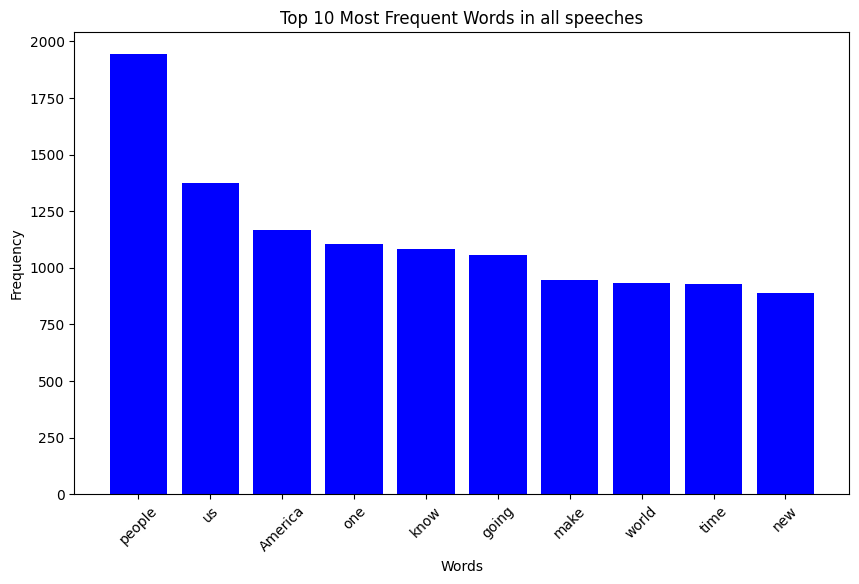

In [234]:
# Create a bar chart for the selected speech
plt.figure(figsize=(10, 6))
plt.bar(overall_words, overall_counts, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top 10 Most Frequent Words in all speeches')
plt.xticks(rotation=45)
plt.show()

In [107]:
tagged = nltk.pos_tag(all_tokens)
entities = nltk.chunk.ne_chunk(tagged)
sia = SentimentIntensityAnalyzer()



In [141]:
tagged_tweets = nltk.pos_tag(all_tokens_tweets)
entities = nltk.chunk.ne_chunk(tagged_tweets)


In [147]:
example = speeches[1]
tweet_example = clean_tweets[4]
print(tweet_example)
sia.polarity_scores(tweet_example)

I also think that most liberals don't spend a lot of time thinking about tolerating. Tolerance connotes condescension.


{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.296}

In [197]:
res = {}
count = 0

for s in tqdm(speeches):
    count += 1
    res[count]=sia.polarity_scores(s)

100%|██████████| 1035/1035 [00:03<00:00, 282.27it/s]


'Do the Conservatives Have a Death Wish?'

In [200]:
count_tweets = 0
res_tweets = {}
for t in (clean_tweets):
    count_tweets += 1
    res_tweets[count_tweets]=sia.polarity_scores(t)

In [201]:
res_tweets

{1: {'neg': 0.148, 'neu': 0.703, 'pos': 0.148, 'compound': 0.0},
 2: {'neg': 0.368, 'neu': 0.377, 'pos': 0.255, 'compound': -0.296},
 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.296},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.157, 'neu': 0.621, 'pos': 0.222, 'compound': 0.2844},
 9: {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.3818},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.202, 'neu': 0.636, 'pos': 0.162, 'compound': -0.1779},
 12: {'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4404},
 13: {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.7269},
 14: {'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.4767},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 16: {'neg': 0.0, 'neu': 0.679, 'pos': 0

In [202]:
res = pd.DataFrame(res).T
res_tweets = pd.DataFrame(res_tweets).T


In [203]:
res_tweets

,neg,neu,pos,compound
1,0.148,0.703,0.148,0.0000
2,0.368,0.377,0.255,-0.2960
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
5,0.000,0.872,0.128,0.2960
...,...,...,...,...
1687,0.000,0.933,0.067,0.0772
1688,0.000,0.705,0.295,0.7717
1689,0.088,0.837,0.075,-0.0772
1690,0.169,0.831,0.000,-0.5040


In [291]:
compounds = res['compound']
bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]


In [292]:
hist, bin_edges = np.histogram(compounds, bins=bins)
bin_labels = [f"({bin_edges[i]}, {bin_edges[i+1]})" for i in range(len(bin_edges)-1)]

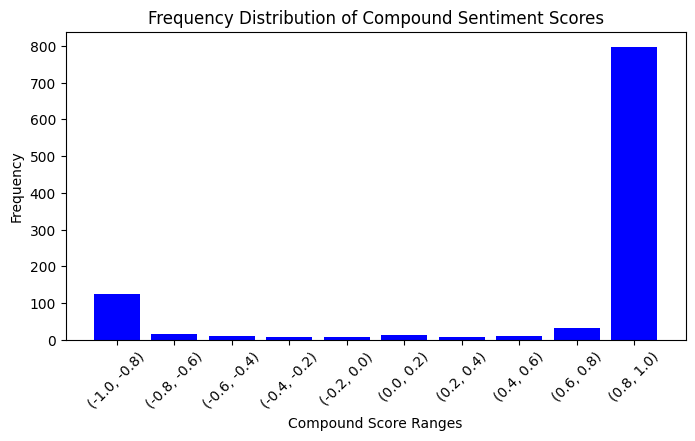

In [206]:
plt.figure(figsize=(8, 4))
plt.bar(bin_labels, hist, color='blue', width=0.8)
plt.xlabel('Compound Score Ranges')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Compound Sentiment Scores')
plt.xticks(rotation=45)
plt.show()

In [293]:
compounds_tweets = res_tweets['compound']
hist, bin_edges = np.histogram(compounds_tweets, bins=bins)
bin_labels = [f"({bin_edges[i]}, {bin_edges[i+1]})" for i in range(len(bin_edges)-1)]

In [289]:
res_tweets['compound'].sum()

21.651200000000003

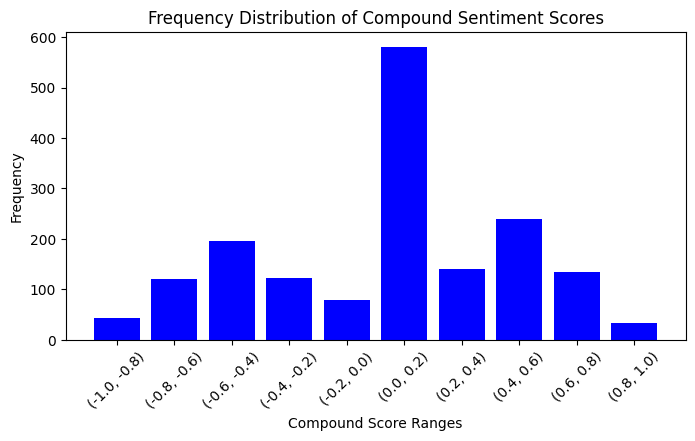

In [287]:
plt.figure(figsize=(8, 4))
plt.bar(bin_labels, hist, color='blue', width=0.8)
plt.xlabel('Compound Score Ranges')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Compound Sentiment Scores')
plt.xticks(rotation=45)
plt.show()

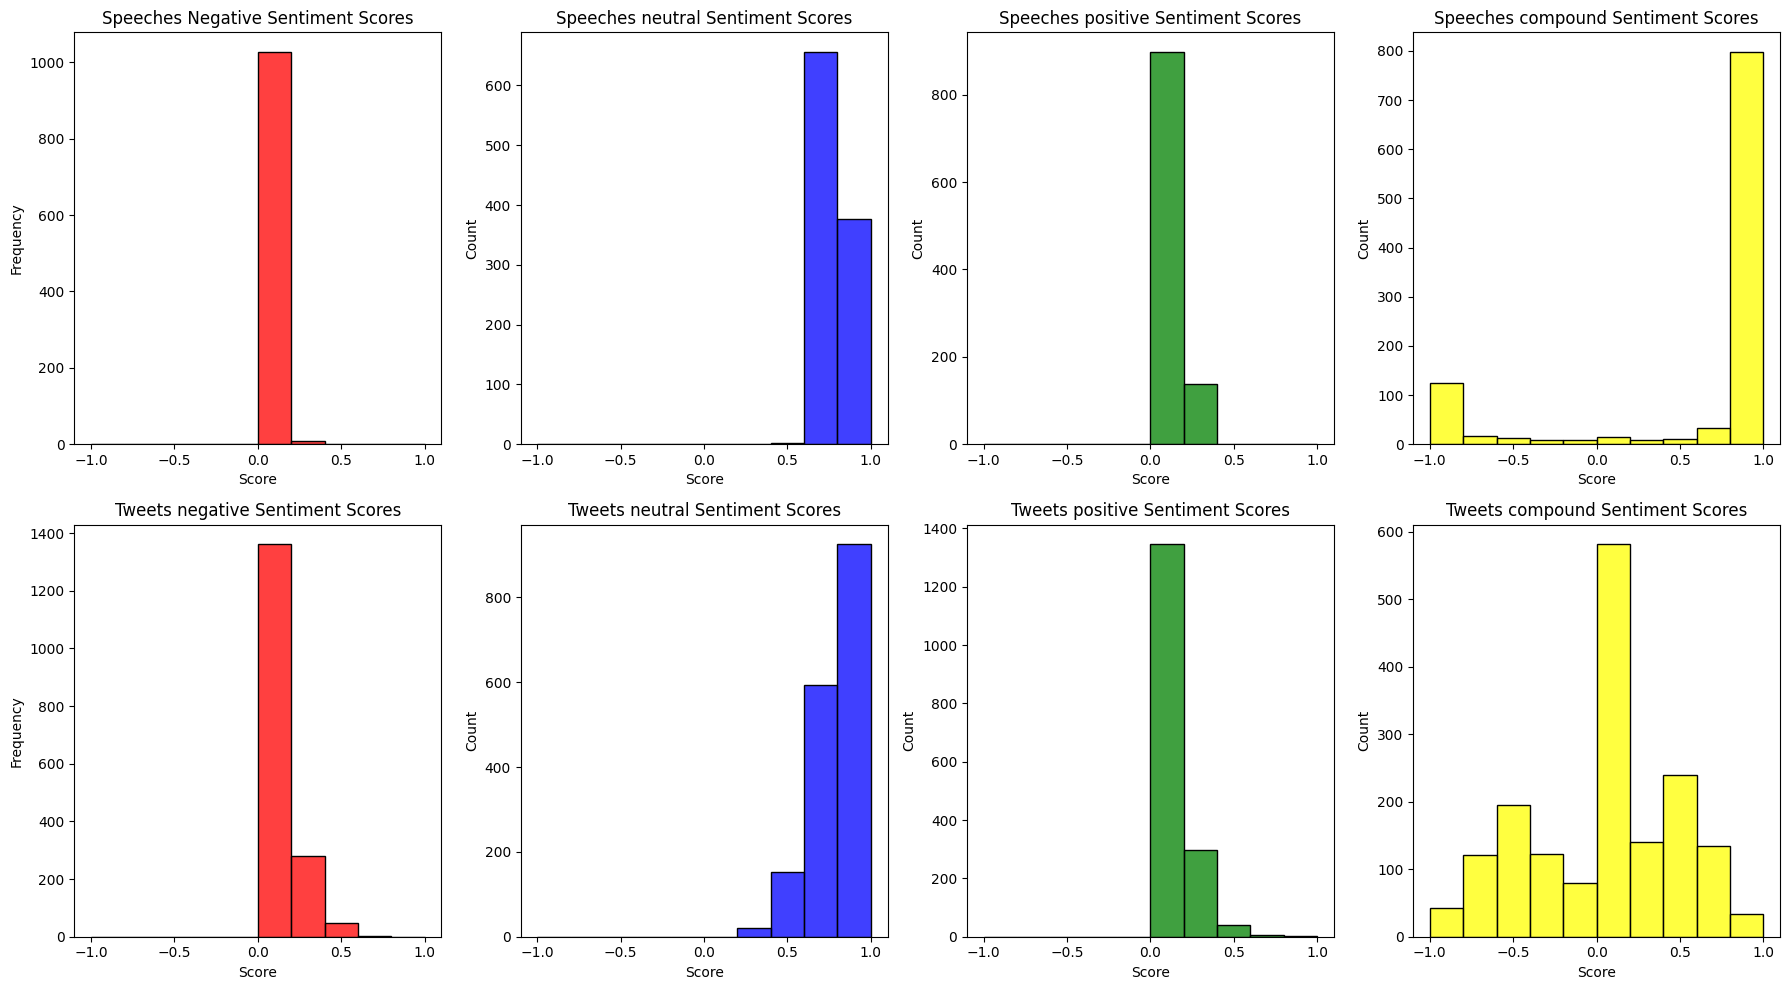

In [288]:
bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]

# Create a figure with 3 subplots, side by side
fig, axes = plt.subplots(2, 4, figsize=(18, 10), sharey=False, )  # sharey ensures all plots share the same y-axis

# Plotting
sns.histplot(res['neg'], bins=bins, ax=axes[0,0], color='red')
axes[0,0].set_title('Speeches Negative Sentiment Scores')
axes[0,0].set_xlabel('Score')
axes[0,0].set_ylabel('Frequency')

sns.histplot(res['neu'], bins=bins, ax=axes[0,1], color='blue')
axes[0,1].set_title('Speeches neutral Sentiment Scores')
axes[0,1].set_xlabel('Score')

sns.histplot(res['pos'], bins=bins, ax=axes[0,2], color='green')
axes[0,2].set_title('Speeches positive Sentiment Scores')
axes[0,2].set_xlabel('Score')

sns.histplot(res['compound'], bins=bins, ax=axes[0,3], color='yellow')
axes[0,3].set_title('Speeches compound Sentiment Scores')
axes[0,3].set_xlabel('Score')

# Plotting
sns.histplot(res_tweets['neg'], bins=bin_edges, ax=axes[1,0], color='red')
axes[1,0].set_title('Tweets negative Sentiment Scores')
axes[1,0].set_xlabel('Score')
axes[1,0].set_ylabel('Frequency')

sns.histplot(res_tweets['neu'], bins=bins, ax=axes[1,1], color='blue')
axes[1,1].set_title('Tweets neutral Sentiment Scores')
axes[1,1].set_xlabel('Score')

sns.histplot(res_tweets['pos'], bins=bins, ax=axes[1,2], color='green')
axes[1,2].set_title('Tweets positive Sentiment Scores')
axes[1,2].set_xlabel('Score')

sns.histplot(res_tweets['compound'], bins=bins, ax=axes[1,3], color='yellow')
axes[1,3].set_title('Tweets compound Sentiment Scores')
axes[1,3].set_xlabel('Score')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

In [218]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [219]:
if torch.cuda.is_available():
    model = model.cuda()

In [220]:
def roberta_score(text):
    encoded_text = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding='max_length')
    if torch.cuda.is_available():
        encoded_text = {key: val.cuda() for key, val in encoded_text.items()}
    output = model(**encoded_text)
    scores = output[0][0].detach().cpu().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_negative':scores[0],
        'roberta_neutral':scores[1],
        'roberta_postive':scores[2]
    }
    return scores_dict

In [221]:
id = 0
results={}
for s in tqdm(speeches):
    vader_result = sia.polarity_scores(s)
    roberta_result = roberta_score(s)
    both = {**vader_result,**roberta_result}
    results[id] = both
    id+=1
    

100%|██████████| 1035/1035 [01:21<00:00, 12.72it/s]


In [225]:
results_df = pd.DataFrame(results).T
results_df

,neg,neu,pos,compound,roberta_negative,roberta_neutral,roberta_postive
0,0.033,0.790,0.177,0.9972,0.028251,0.353336,0.618413
1,0.064,0.794,0.142,0.9916,0.222882,0.536554,0.240564
2,0.105,0.742,0.153,0.9769,0.267065,0.557209,0.175726
3,0.083,0.713,0.205,0.9971,0.395100,0.481178,0.123722
4,0.058,0.781,0.162,0.9749,0.004266,0.080288,0.915446
...,...,...,...,...,...,...,...
1030,0.033,0.760,0.208,0.9950,0.080012,0.341314,0.578674
1031,0.031,0.830,0.139,0.9959,0.045791,0.345743,0.608466
1032,0.064,0.789,0.147,0.9946,0.074187,0.462533,0.463280
1033,0.082,0.712,0.206,0.9976,0.212303,0.535420,0.252277


In [223]:
tweet_id = 0
results_tweets={}
for t in tqdm(clean_tweets):
    vader_result = sia.polarity_scores(t)
    roberta_result = roberta_score(t)
    both = {**vader_result,**roberta_result}
    results_tweets[tweet_id] = both
    tweet_id+=1
    

100%|██████████| 1691/1691 [02:00<00:00, 14.03it/s]


In [226]:
results_tweets_df = pd.DataFrame(results_tweets).T
results_tweets_df

,neg,neu,pos,compound,roberta_negative,roberta_neutral,roberta_postive
0,0.148,0.703,0.148,0.0000,0.009841,0.791465,0.198694
1,0.368,0.377,0.255,-0.2960,0.535217,0.454070,0.010713
2,0.000,1.000,0.000,0.0000,0.202417,0.745739,0.051844
3,0.000,1.000,0.000,0.0000,0.059848,0.841694,0.098458
4,0.000,0.872,0.128,0.2960,0.836599,0.152747,0.010654
...,...,...,...,...,...,...,...
1686,0.000,0.933,0.067,0.0772,0.050384,0.863241,0.086374
1687,0.000,0.705,0.295,0.7717,0.096712,0.656124,0.247164
1688,0.088,0.837,0.075,-0.0772,0.270531,0.696598,0.032871
1689,0.169,0.831,0.000,-0.5040,0.716203,0.274392,0.009405


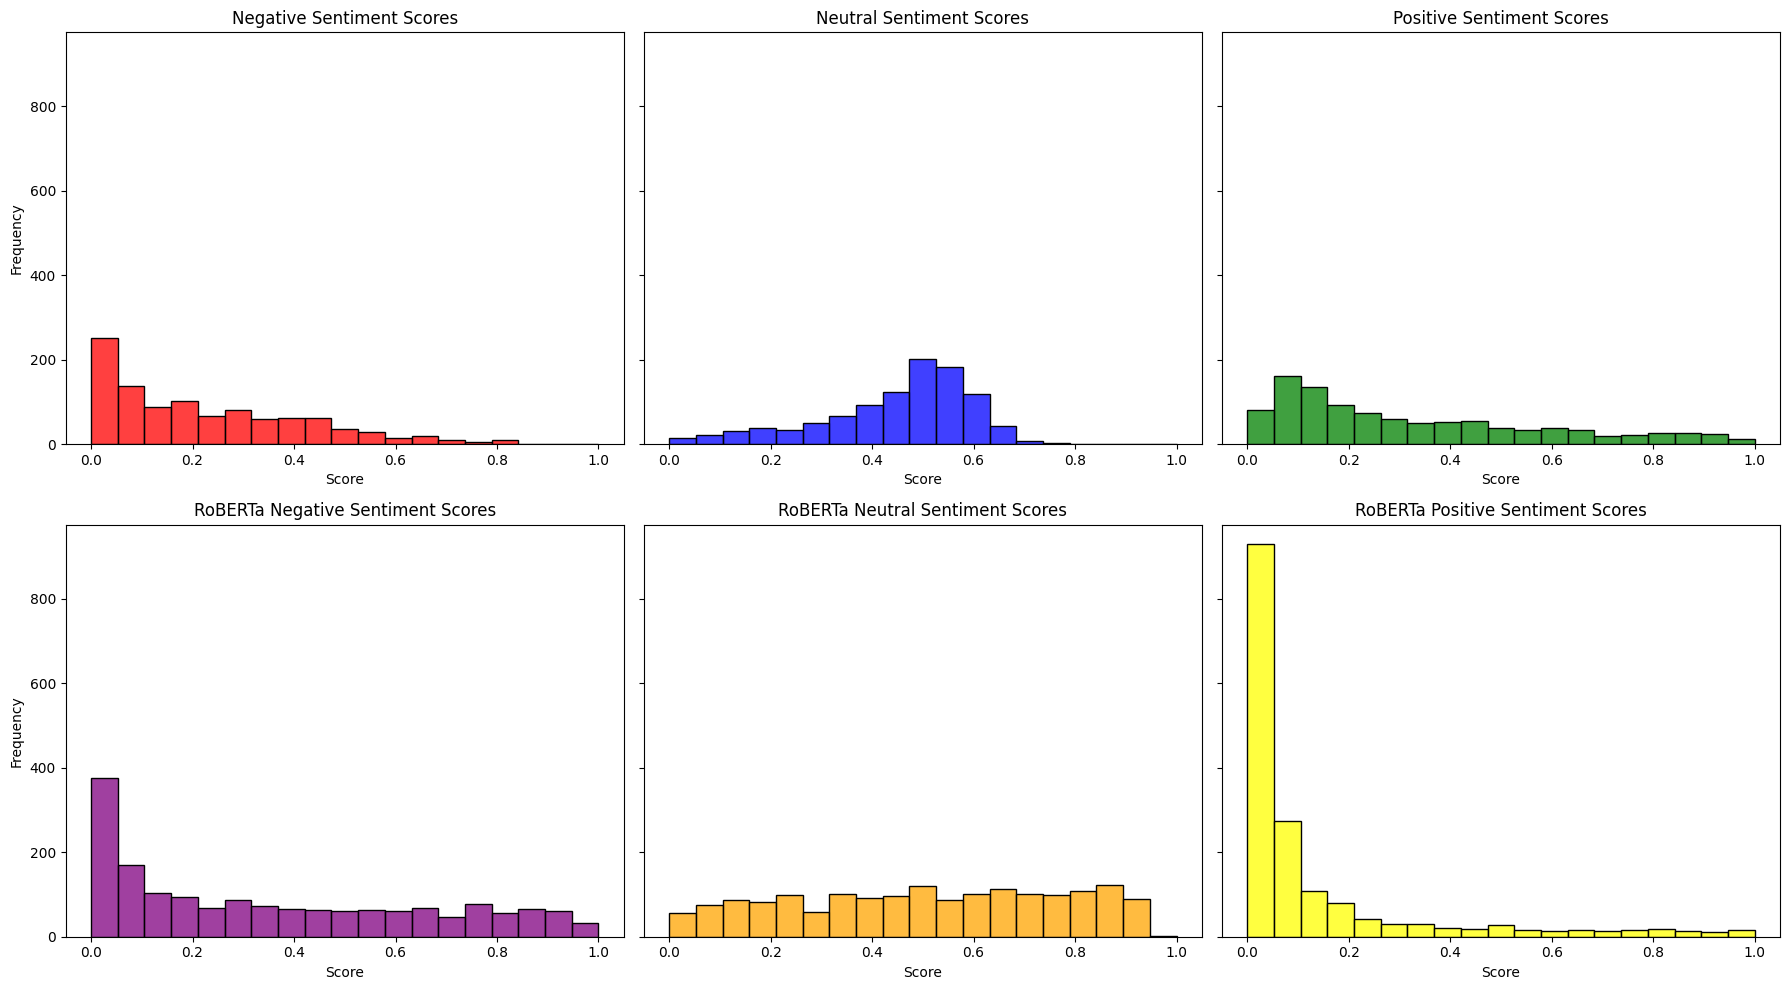

In [294]:
bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)  # No shared y-axis by default

# Define the bin edges if needed, or remove if you want automatic bins
bins = np.linspace(0, 1, 20)

# First Row Plots
sns.histplot(results_df['roberta_negative'], bins=bins, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Negative Sentiment Scores')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(results_df['roberta_neutral'], bins=bins, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Neutral Sentiment Scores')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(results_df['roberta_postive'], bins=bins, ax=axes[0, 2], color='green')
axes[0, 2].set_title('Positive Sentiment Scores')
axes[0, 2].set_xlabel('Score')
axes[0, 2].set_ylabel('Frequency')

# Second Row Plots
sns.histplot(results_tweets_df['roberta_negative'], bins=bins, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('RoBERTa Negative Sentiment Scores')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(results_tweets_df['roberta_neutral'], bins=bins, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('RoBERTa Neutral Sentiment Scores')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(results_tweets_df['roberta_postive'], bins=bins, ax=axes[1, 2], color='yellow')
axes[1, 2].set_title('RoBERTa Positive Sentiment Scores')
axes[1, 2].set_xlabel('Score')
axes[1, 2].set_ylabel('Frequency')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

In [313]:
print(results_df['neg'].sum()/len(results_df))
print(results_df['neu'].sum()/len(results_df))
print(results_df['pos'].sum()/len(results_df))

0.07164830917874397
0.7801140096618356
0.14730628019323672


In [314]:
print(results_df['roberta_negative'].sum()/len(results_df))
print(results_df['roberta_neutral'].sum()/len(results_df))
print(results_df['roberta_postive'].sum()/len(results_df))

0.2253047947111598
0.4480826347814378
0.3266125719625377


In [318]:
for i in results_tweets_df:
    if results_tweets_df['roberta_negative'][i] < results_tweets_df['roberta_postive'][i]:
        print('here')

KeyError: 'neg'

In [315]:
print(results_tweets_df['neg'].sum()/len(results_tweets_df))
print(results_tweets_df['neu'].sum()/len(results_tweets_df))
print(results_tweets_df['pos'].sum()/len(results_tweets_df))

0.09077528089887639
0.8122909520993495
0.0969337670017741


In [316]:
print(results_tweets_df['roberta_negative'].sum()/len(results_tweets_df))
print(results_tweets_df['roberta_neutral'].sum()/len(results_tweets_df))
print(results_tweets_df['roberta_postive'].sum()/len(results_tweets_df))

0.3557424099644589
0.507938791617436
0.13631879972641772


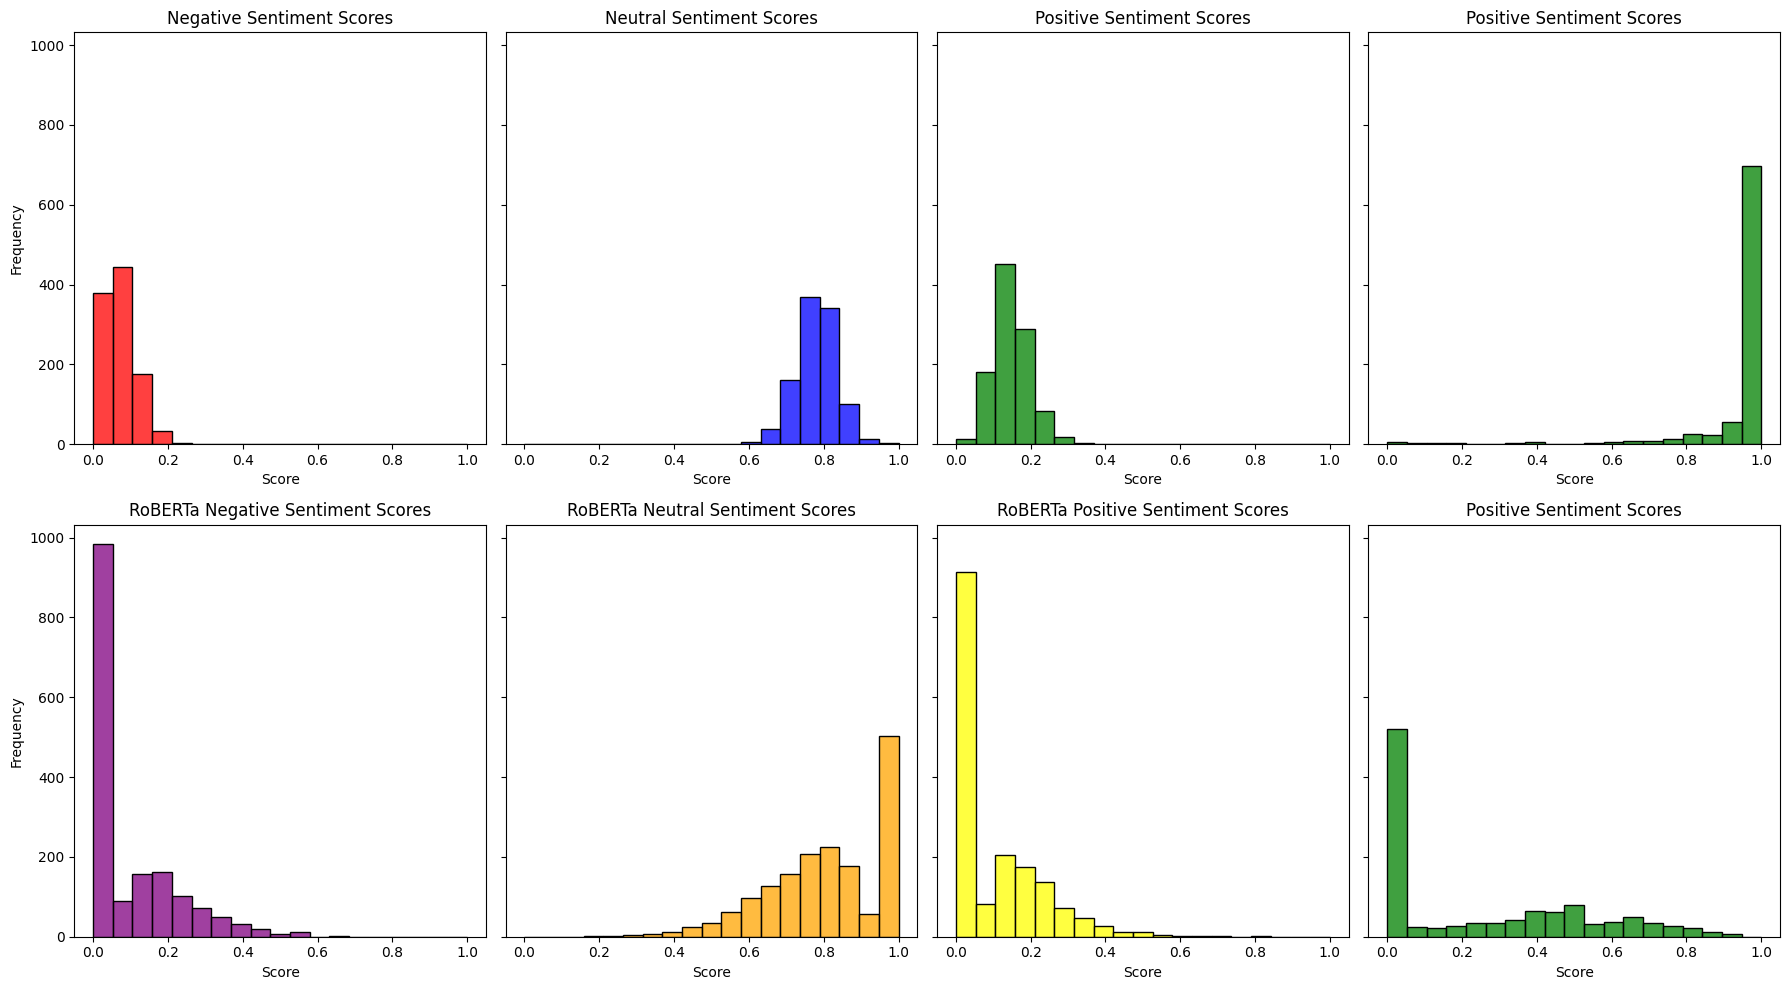

In [310]:

fig, axes = plt.subplots(2, 4, figsize=(18, 10), sharey=True)  # No shared y-axis by default

# Define the bin edges if needed, or remove if you want automatic bins
bins = np.linspace(0, 1, 20)

# First Row Plots
sns.histplot(results_df['neg'], bins=bins, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Negative Sentiment Scores')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(results_df['neu'], bins=bins, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Neutral Sentiment Scores')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(results_df['pos'], bins=bins, ax=axes[0, 2], color='green')
axes[0, 2].set_title('Positive Sentiment Scores')
axes[0, 2].set_xlabel('Score')
axes[0, 2].set_ylabel('Frequency')

sns.histplot(results_df['compound'], bins=bins, ax=axes[0, 3], color='green')
axes[0, 3].set_title('Positive Sentiment Scores')
axes[0, 3].set_xlabel('Score')
axes[0, 3].set_ylabel('Frequency')

# Second Row Plots
sns.histplot(results_tweets_df['neg'], bins=bins, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('RoBERTa Negative Sentiment Scores')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(results_tweets_df['neu'], bins=bins, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('RoBERTa Neutral Sentiment Scores')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(results_tweets_df['pos'], bins=bins, ax=axes[1, 2], color='yellow')
axes[1, 2].set_title('RoBERTa Positive Sentiment Scores')
axes[1, 2].set_xlabel('Score')
axes[1, 2].set_ylabel('Frequency')


sns.histplot(results_tweets_df['compound'], bins=bins, ax=axes[1, 3], color='green')
axes[1, 3].set_title('Positive Sentiment Scores')
axes[1, 3].set_xlabel('Score')
axes[1, 3].set_ylabel('Frequency')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [274]:
print(len(results_df))
len(results_tweets_df)

1035


1691

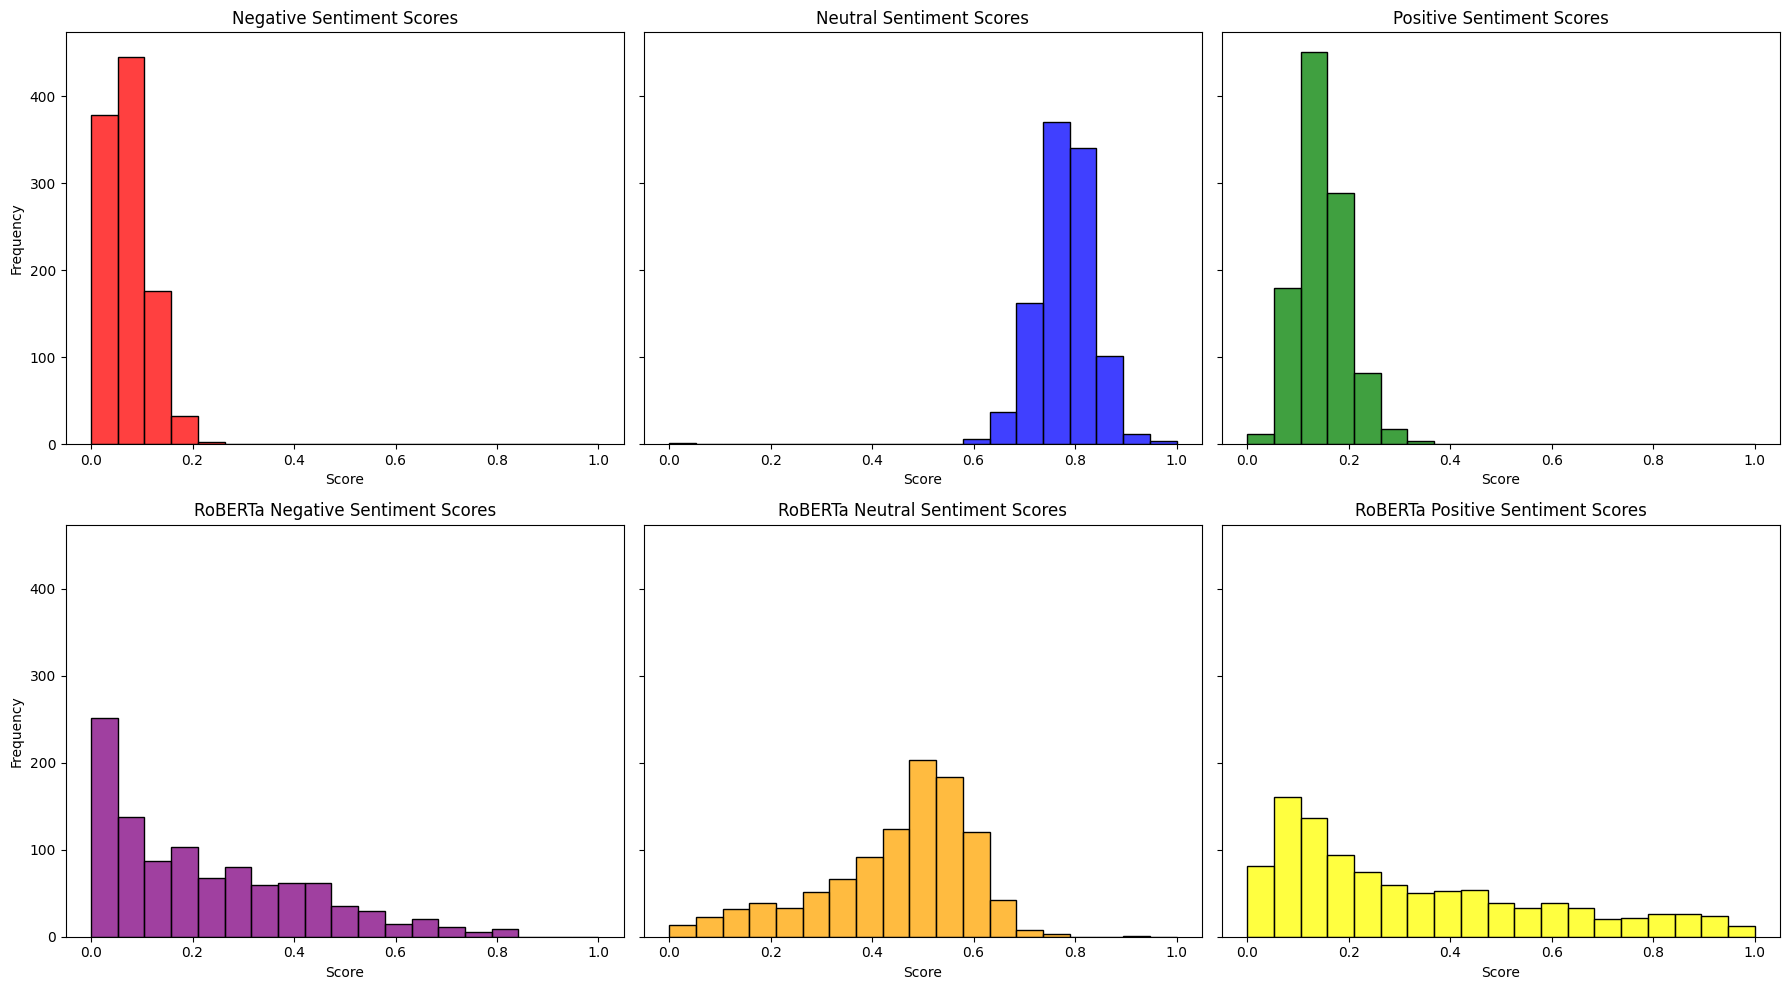

In [271]:
bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)  # No shared y-axis by default

# Define the bin edges if needed, or remove if you want automatic bins
bins = np.linspace(0, 1, 20)

# First Row Plots
sns.histplot(results_df['neg'], bins=bins, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Negative Sentiment Scores')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(results_df['neu'], bins=bins, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Neutral Sentiment Scores')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(results_df['pos'], bins=bins, ax=axes[0, 2], color='green')
axes[0, 2].set_title('Positive Sentiment Scores')
axes[0, 2].set_xlabel('Score')
axes[0, 2].set_ylabel('Frequency')

# Second Row Plots
sns.histplot(results_df['roberta_negative'], bins=bins, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('RoBERTa Negative Sentiment Scores')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(results_df['roberta_neutral'], bins=bins, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('RoBERTa Neutral Sentiment Scores')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(results_df['roberta_postive'], bins=bins, ax=axes[1, 2], color='yellow')
axes[1, 2].set_title('RoBERTa Positive Sentiment Scores')
axes[1, 2].set_xlabel('Score')
axes[1, 2].set_ylabel('Frequency')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

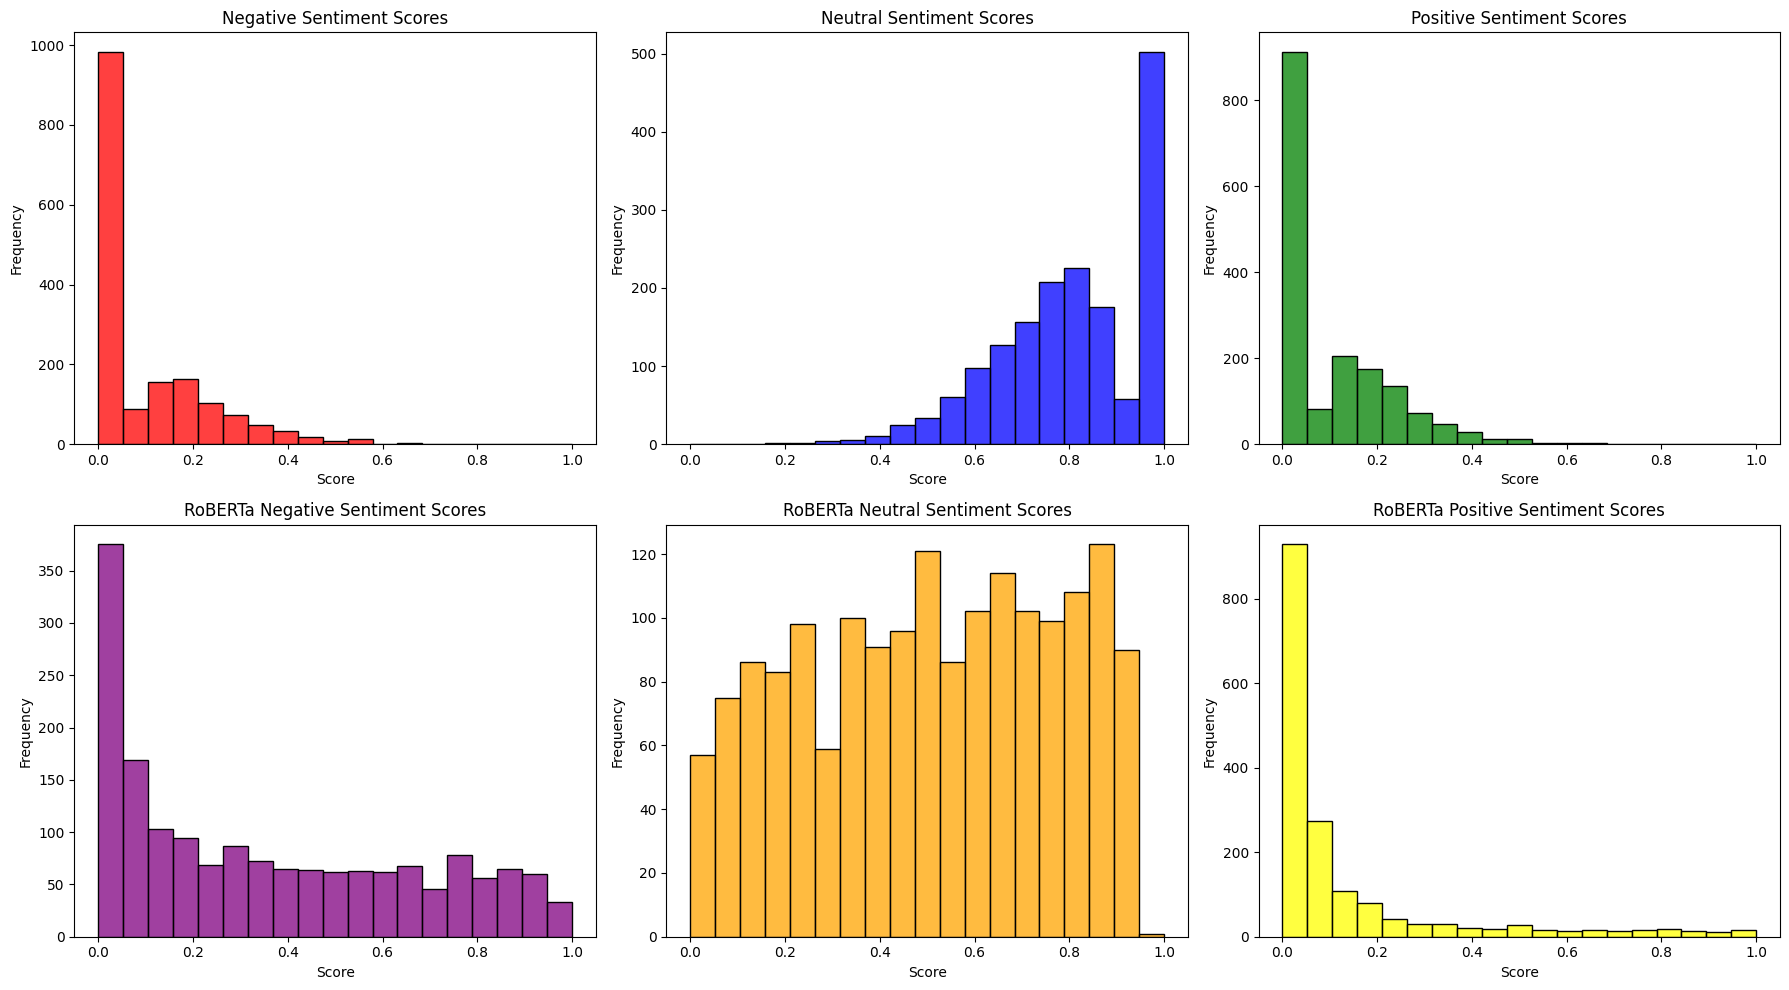

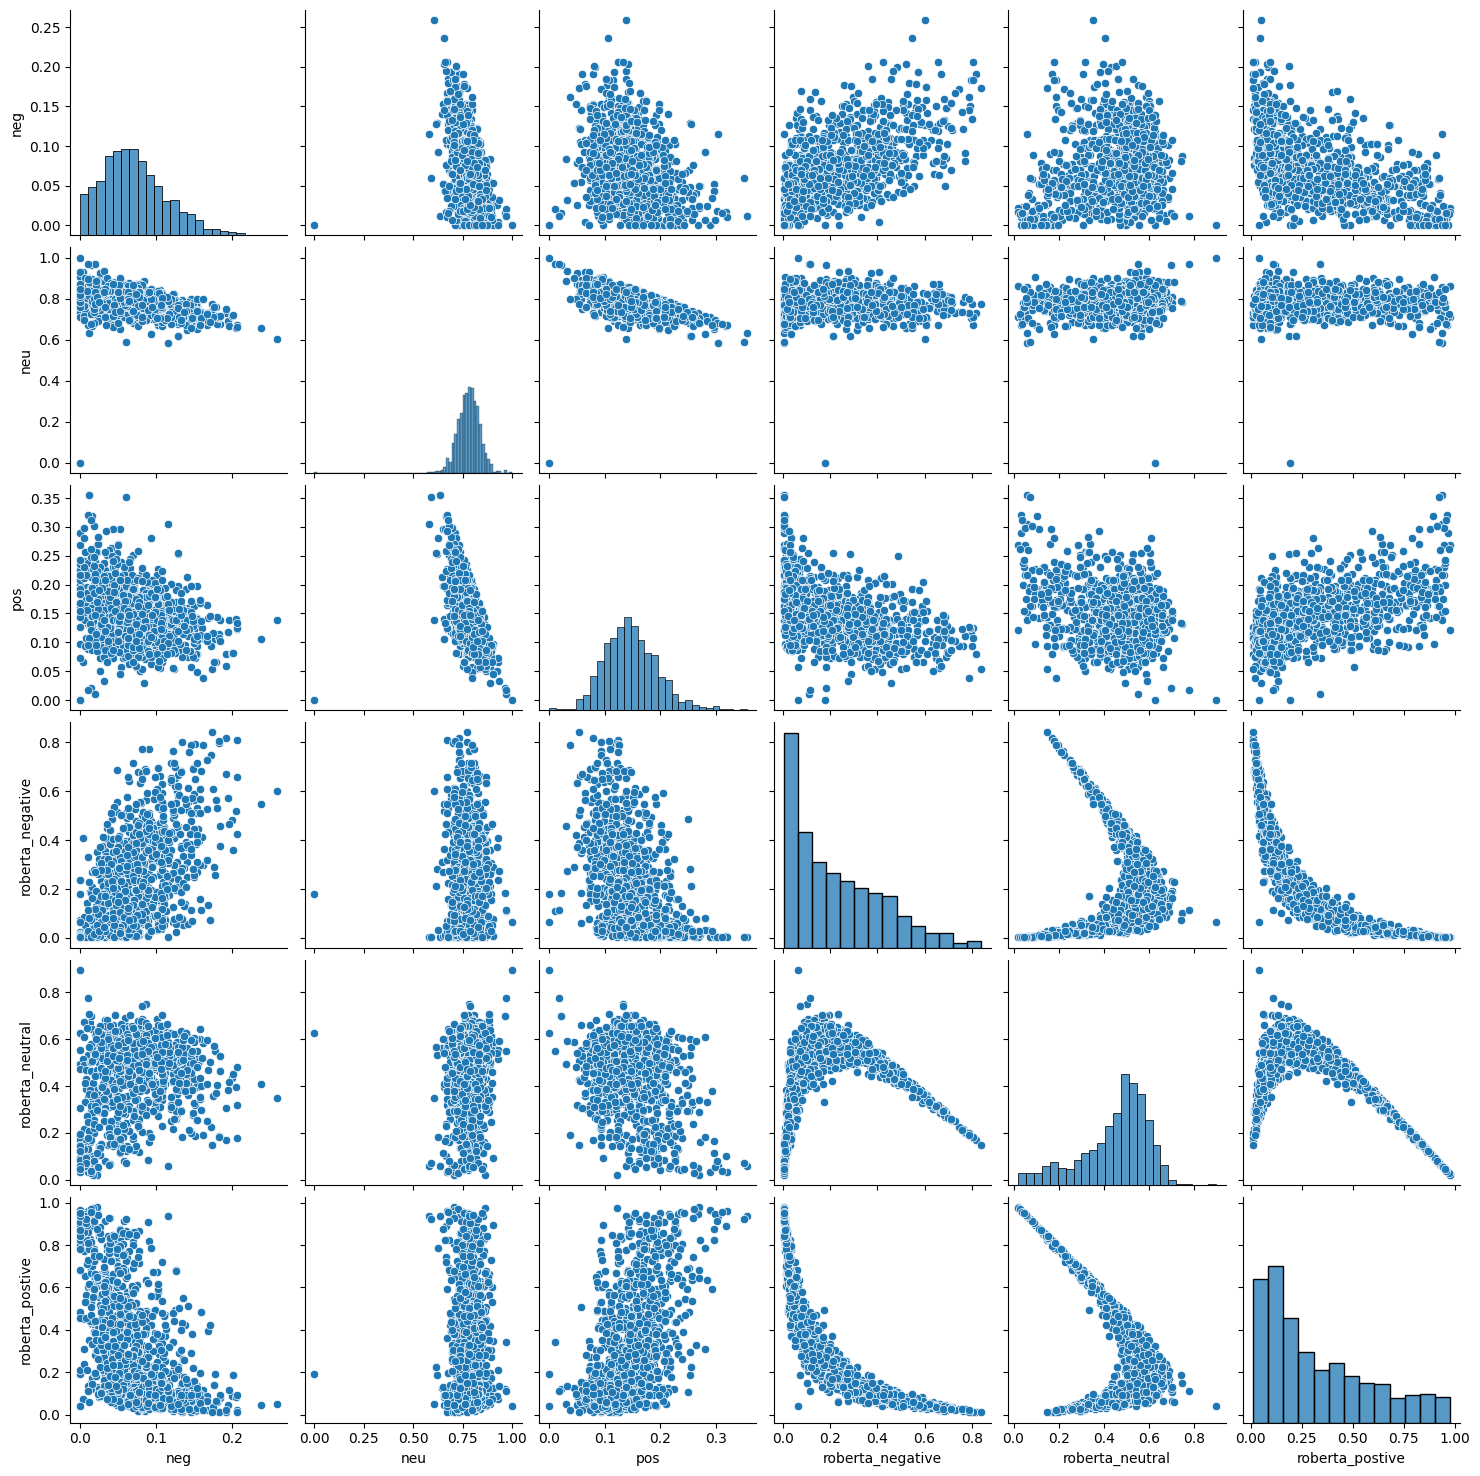

In [325]:
sns.pairplot(data = results_df,
             vars = ['neg', 'neu', 'pos', 'roberta_negative', 'roberta_neutral',
       'roberta_postive'])
plt.show()